In [1]:
######################################################
# Investment Portfolio Analysis with Python          #
# Equities or Stocks                                 #
# (c) Diego Fernandez Garcia 2016                    #
# www.exfinsis.com                                   #
######################################################

# 1. Packages Importing

# 1.1. Packages import
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt

##########################################

# 2. Asset Classes

# 2.3. Equities or Stocks
    
# 2.3.1. U.S. Total Stock Market
# 2.3.2. U.S. Large Cap Stock Market
# 2.3.3. U.S. Small Cap Stock Market
# 2.3.4. U.S. Small Cap Growth Stock Market
# 2.3.5. U.S. Small Cap Value Stock Market
# 2.3.6. International Total Stock Market
# 2.3.7. International Developed Stock Market
# 2.3.8. International Emerging Stock Market

In [2]:
# Data Query and Range Delimiting
stocksquery = web.DataReader(['CWI', 'EFA', 'SPY', 'VB', 'VBK', 'VBR', 'VTI', 'VWO'], 'yahoo', '2006-04-01',
                            '2016-05-01')
cstocks = stocksquery['Close']
mstocksall = cstocks.asfreq('M', method='pad')
mstocksall.columns = ['mistocks', 'mdeveloped', 'mlarge', 'msmall', 'mgrowth', 'mvalue', 'mstocks', 'memerging']

# Monthly and Annual Returns Calculation
mstocksall.loc[:, 'mstocksret'] = mstocksall.loc[:, 'mstocks'] / mstocksall.loc[:, 'mstocks'].shift(1) - 1
mstocksall.loc[:, 'astocksret'] = mstocksall.loc[:, 'mstocks'] / mstocksall.loc[:, 'mstocks'].shift(12) - 1

mstocksall.loc[:, 'mlargeret'] = mstocksall.loc[:, 'mlarge'] / mstocksall.loc[:, 'mlarge'].shift(1) - 1
mstocksall.loc[:, 'alargeret'] = mstocksall.loc[:, 'mlarge'] / mstocksall.loc[:, 'mlarge'].shift(12) - 1

mstocksall.loc[:, 'msmallret'] = mstocksall.loc[:, 'msmall'] / mstocksall.loc[:, 'msmall'].shift(1) - 1
mstocksall.loc[:, 'asmallret'] = mstocksall.loc[:, 'msmall'] / mstocksall.loc[:, 'msmall'].shift(12) - 1

mstocksall.loc[:, 'mgrowthret'] = mstocksall.loc[:, 'mgrowth'] / mstocksall.loc[:, 'mgrowth'].shift(1) - 1
mstocksall.loc[:, 'agrowthret'] = mstocksall.loc[:, 'mgrowth'] / mstocksall.loc[:, 'mgrowth'].shift(12) - 1

mstocksall.loc[:, 'mvalueret'] = mstocksall.loc[:, 'mvalue'] / mstocksall.loc[:, 'mvalue'].shift(1) - 1
mstocksall.loc[:, 'avalueret'] = mstocksall.loc[:, 'mvalue'] / mstocksall.loc[:, 'mvalue'].shift(12) - 1

mstocksall.loc[:, 'mistocksret'] = mstocksall.loc[:, 'mistocks'] / mstocksall.loc[:, 'mistocks'].shift(1) - 1
mstocksall.loc[:, 'aistocksret'] = mstocksall.loc[:, 'mistocks'] / mstocksall.loc[:, 'mistocks'].shift(12) - 1

mstocksall.loc[:, 'mdevelopedret'] = mstocksall.loc[:, 'mdeveloped'] / mstocksall.loc[:, 'mdeveloped'].shift(1) - 1
mstocksall.loc[:, 'adevelopedret'] = mstocksall.loc[:, 'mdeveloped'] / mstocksall.loc[:, 'mdeveloped'].shift(12) - 1

mstocksall.loc[:, 'memergingret'] = mstocksall.loc[:, 'memerging'] / mstocksall.loc[:, 'memerging'].shift(1) - 1
mstocksall.loc[:, 'aemergingret'] = mstocksall.loc[:, 'memerging'] / mstocksall.loc[:, 'memerging'].shift(12) - 1

# Cumulative Monthly Returns Calculation
mstocksall.loc[:, 'mstockscum'] = np.cumprod(mstocksall.loc[:, 'mstocksret'] + 1) - 1
mstocksall.loc[:, 'mlargecum'] = np.cumprod(mstocksall.loc[:, 'mlargeret'] + 1) - 1
mstocksall.loc[:, 'msmallcum'] = np.cumprod(mstocksall.loc[:, 'msmallret'] + 1) - 1
mstocksall.loc[:, 'mgrowthcum'] = np.cumprod(mstocksall.loc[:, 'mgrowthret'] + 1) - 1
mstocksall.loc[:, 'mvaluecum'] = np.cumprod(mstocksall.loc[:, 'mvalueret'] + 1) - 1
mstocksall.loc[:, 'mistockscum'] = np.cumprod(mstocksall.loc[:, 'mistocksret'] + 1) - 1
mstocksall.loc[:, 'mdevelopedcum'] = np.cumprod(mstocksall.loc[:, 'mdevelopedret'] + 1) - 1
mstocksall.loc[:, 'memergingcum'] = np.cumprod(mstocksall.loc[:, 'memergingret'] + 1) - 1

# Annualized Monthly Returns Calculation
mstocksall.loc[:, 'mstockscuma'] = np.cumprod(mstocksall.loc[:, 'mstocksret'] + 1)  ** (12 / len(mstocksall)) - 1
mstocksall.loc[:, 'mlargecuma'] = np.cumprod(mstocksall.loc[:, 'mlargeret'] + 1)  ** (12 / len(mstocksall)) - 1
mstocksall.loc[:, 'msmallcuma'] = np.cumprod(mstocksall.loc[:, 'msmallret'] + 1)  ** (12 / len(mstocksall)) - 1
mstocksall.loc[:, 'mgrowthcuma'] = np.cumprod(mstocksall.loc[:, 'mgrowthret'] + 1)  ** (12 / len(mstocksall)) - 1
mstocksall.loc[:, 'mvaluecuma'] = np.cumprod(mstocksall.loc[:, 'mvalueret'] + 1)  ** (12 / len(mstocksall)) - 1
mstocksall.loc[:, 'mistockscuma'] = np.cumprod(mstocksall.loc[:, 'mistocksret'] + 1)  ** (12 / len(mstocksall)) - 1
mstocksall.loc[:, 'mdevelopedcuma'] = np.cumprod(mstocksall.loc[:, 'mdevelopedret'] + 1)  ** (12 / len(mstocksall)) - 1
mstocksall.loc[:, 'memergingcuma'] = np.cumprod(mstocksall.loc[:, 'memergingret'] + 1)  ** (12 / len(mstocksall)) - 1

# Obtain last Annualized Monthly Return
lastdate = dt.datetime(2016, 3, 31)
mstocksreta = mstocksall.at[lastdate, 'mstockscuma']
mlargereta = mstocksall.at[lastdate, 'mlargecuma']
msmallreta = mstocksall.at[lastdate, 'msmallcuma']
mgrowthreta = mstocksall.at[lastdate, 'mgrowthcuma']
mvaluereta = mstocksall.at[lastdate, 'mvaluecuma']
mistocksreta = mstocksall.at[lastdate, 'mistockscuma']
mdevelopedreta = mstocksall.at[lastdate, 'mdevelopedcuma']
memergingreta = mstocksall.at[lastdate, 'memergingcuma']

# Annualized Monthly Standard Deviation Calculation
mstocksstdeva = np.std(mstocksall.loc[:, 'mstocksret']) * np.sqrt(12)
mlargestdeva = np.std(mstocksall.loc[:, 'mlargeret']) * np.sqrt(12)
msmallstdeva = np.std(mstocksall.loc[:, 'msmallret']) * np.sqrt(12)
mgrowthstdeva = np.std(mstocksall.loc[:, 'mgrowthret']) * np.sqrt(12)
mvaluestdeva = np.std(mstocksall.loc[:, 'mvalueret']) * np.sqrt(12)
mistocksstdeva = np.std(mstocksall.loc[:, 'mistocksret']) * np.sqrt(12)
mdevelopedstdeva = np.std(mstocksall.loc[:, 'mdevelopedret']) * np.sqrt(12)
memergingstdeva = np.std(mstocksall.loc[:, 'memergingret']) * np.sqrt(12)


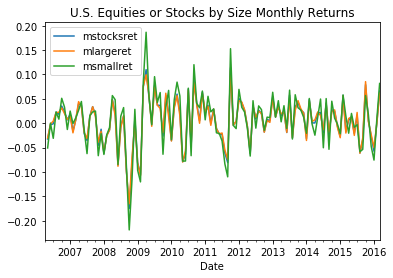

In [3]:
# 2.3.9. Equities or Stocks Charts and Tables

# Monthly Returns Charts
mstocksall.plot(y=['mstocksret', 'mlargeret', 'msmallret'])
plt.title('U.S. Equities or Stocks by Size Monthly Returns')
plt.legend(loc='upper left')
plt.show()


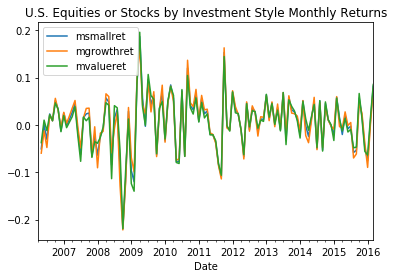

In [4]:
mstocksall.plot(y=['msmallret', 'mgrowthret', 'mvalueret'])
plt.title('U.S. Equities or Stocks by Investment Style Monthly Returns')
plt.legend(loc='upper left')
plt.show()


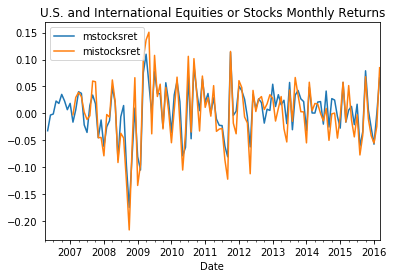

In [5]:
mstocksall.plot(y=['mstocksret', 'mistocksret'])
plt.title('U.S. and International Equities or Stocks Monthly Returns')
plt.legend(loc='upper left')
plt.show()


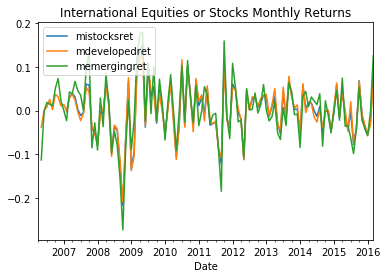

In [6]:
mstocksall.plot(y=['mistocksret', 'mdevelopedret', 'memergingret'])
plt.title('International Equities or Stocks Monthly Returns')
plt.legend(loc='upper left')
plt.show()

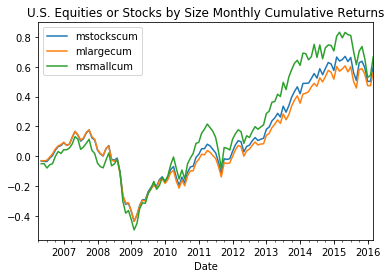

In [7]:
# Cumulative Monthly Returns Chart
mstocksall.plot(y=['mstockscum', 'mlargecum', 'msmallcum'])
plt.title('U.S. Equities or Stocks by Size Monthly Cumulative Returns')
plt.legend(loc='upper left')
plt.show()

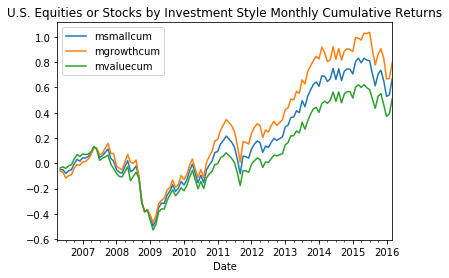

In [8]:
mstocksall.plot(y=['msmallcum', 'mgrowthcum', 'mvaluecum'])
plt.title('U.S. Equities or Stocks by Investment Style Monthly Cumulative Returns')
plt.legend(loc='upper left')
plt.show()

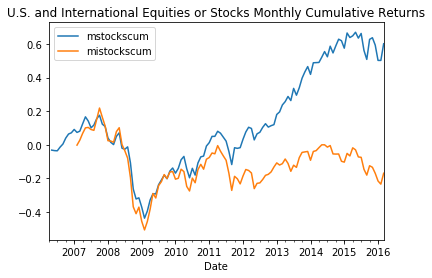

In [9]:
mstocksall.plot(y=['mstockscum', 'mistockscum'])
plt.title('U.S. and International Equities or Stocks Monthly Cumulative Returns')
plt.legend(loc='upper left')
plt.show()

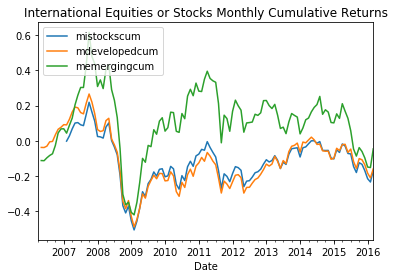

In [10]:
mstocksall.plot(y=['mistockscum', 'mdevelopedcum', 'memergingcum'])
plt.title('International Equities or Stocks Monthly Cumulative Returns')
plt.legend(loc='upper left')
plt.show()


In [11]:

# Annualized Monthly Return and Standard Deviation Table
stocksdata1 = [{'0': '', '1': 'mstocksret', '2': 'mlargeret', '3': 'msmallret'},
        {'0': 'Annualized Return', '1': mstocksreta, '2': mlargereta, '3': msmallreta},
        {'0': 'Annualized Standard Deviation', '1': mstocksstdeva, '2': mlargestdeva, '3': msmallstdeva}]
stockstable1 = pd.DataFrame(stocksdata1)
print("")
print(stockstable1)
print("")



                               0           1          2          3
0                                 mstocksret  mlargeret  msmallret
1              Annualized Return           0          0          0
2  Annualized Standard Deviation    0.157567   0.152374   0.197145



In [12]:
stocksdata2 = [{'0': '', '1': 'msmallret', '2': 'mgrowthret', '3': 'mvalueret'},
        {'0': 'Annualized Return', '1': msmallreta, '2': mgrowthreta, '3': mvaluereta},
        {'0': 'Annualized Standard Deviation', '1': msmallstdeva, '2': mgrowthstdeva, '3': mvaluestdeva}]
stockstable2 = pd.DataFrame(stocksdata2)
print("")
print(stockstable2)
print("")


                               0          1           2          3
0                                 msmallret  mgrowthret  mvalueret
1              Annualized Return          0           0          0
2  Annualized Standard Deviation   0.197145    0.201385   0.196586



In [13]:
stocksdata3 = [{'0': '', '1': 'mstocksret', '2': 'mistocksret'},
        {'0': 'Annualized Return', '1': mstocksreta, '2': mistocksreta},
        {'0': 'Annualized Standard Deviation', '1': mstocksstdeva, '2': mistocksstdeva}]
stockstable3 = pd.DataFrame(stocksdata3)
print("")
print(stockstable3)
print("")


                               0           1            2
0                                 mstocksret  mistocksret
1              Annualized Return           0            0
2  Annualized Standard Deviation    0.157567     0.204553



In [14]:
stocksdata4 = [{'0': '', '1': 'mistocksret', '2': 'mdevelopedret', '3': 'memergingret'},
        {'0': 'Annualized Return', '1': mistocksreta, '2': mdevelopedreta, '3': memergingreta},
        {'0': 'Annualized Standard Deviation', '1': mistocksstdeva, '2': mdevelopedstdeva, '3': memergingstdeva}]
stockstable4 = pd.DataFrame(stocksdata4)
print("")
print(stockstable4)
print("")


                               0            1              2             3
0                                 mistocksret  mdevelopedret  memergingret
1              Annualized Return            0              0             0
2  Annualized Standard Deviation     0.204553        0.19237      0.240949

